In [2]:
## RUN THIS CELL TO PROPERLY HIGHLIGHT THE HEADER
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

## Introduction

`Unsupervised models` are trained models on data without labels. Instead of telling an unsupervised algorithm what it should be looking for in the data, the algorithm does the work itself, in a sense independently finding structure within the data. It is very common in machine learning tasks involving large number of features, that one is advised to use `Principal component analysis` (a.k.a `PCA`). 

`PCA` is a statistical technique for reducing the number of dimensions in our original dataset whilst retaining most information. It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed. It does not do this using guesswork but using hard mathematics and it uses something known as the `eigenvalues` and `eigenvectors` of the data-matrix.

`Eigenvectors` (also known as `principal component`) are basically vectors that are linearly uncorrelated and carry the  variability in our data along their direction.

<img class="aligncenter wp-image-3112" src="fig/1200px-GaussianScatterPCA.svg.png" alt="PCA" width="650" height="550">

## Overview of PCA

### Algorithm

`PCA`, can be performed in the following steps:

* calculate the mean of each column
* center the value in each column by subtracting the mean column value
* calculate covariance matrix of centered matrix
* calculate eigendecomposition of the covariance (eigenvectors represent the magnitude of directions or components for the reduce subspace)

### Mathematics of PCA

Mathematically, PCA is implemented as follows:
<br>

* Given $m$ data points, $\{x_1,x_2,...,x_m\} \in R^n$, with their mean $\mu = \frac{1}{m}\sum_{i=1}^{m}x_i$
* Find a direction $w \in R^n$ where $\|w\| \leq 1$
* Such that the variance of the data along the direction $w$ is maximized 
$$\max_{w:\|w\|\leq 1}\underbrace{\frac{1}{m}\sum_{i=1}^{m}\left(w^Tx_i-w^T\mu\right)^2}_{\text{variance}}$$
* It can be easily shown that this equals
$$w^T\underbrace{\left(\frac{1}{m}\sum_{i=1}^{m}\left(x_i-\mu \right)\left(x_i-\mu \right)^T\right)}_{\text{covariance matrix C}}w = w^TCw$$
**So, the optimization problem becomes $$\max_{w:\|w\|\leq 1}w^TCw$$**
* This can be formulated as an eigenvalue problem
    * Given a symmetric matrix $C \in R^{n\times n}$
    * Find a row vector $w \in R^n$ and $\|w\| = 1$
    * Such that $Cw = \lambda w$
* There will be multiple solutions of $w_1, w_2, ...$ (eigenvectors) with different $\lambda_1,\lambda_2,...$ (eigenvalues)
    * They are ortho-normal: $w_i^Tw_i = 1, w_i^Tw_j=0$<br>
<br>

**To find the top $k$ principal components, first find the mean and covariance matrix from the data $$ \mu = \frac{1}{m}\sum_{i=1}^{m}x_i \ and \ C = \frac{1}{m}\sum_{i=1}^{m}\left(x_i-\mu\right)\left(x_i-\mu\right)^T$$ calculate the first $k$ eigenvectors $w_1,w_2,...,w_k$ of $C$ corresponding to the largest eigenvalues $\lambda_1,\lambda_2,...,\lambda_k$.**

**Then compute the reduced representation 
$$z_i = \left(\begin{split}w_1^T\left(x_i-\mu\right)/\sqrt{\lambda_1}\cr w_2^T\left(x_i-\mu\right)/\sqrt{\lambda_2}\end{split}\right)$$**

## Intuition Behind PCA

In [1]:
import os
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.sparse.linalg import eigs
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

warnings.filterwarnings("ignore")

Let's consider the following dataset...

In [ ]:
food_all = pd.read_csv('data/food-data.csv', index_col=0,
                       sep=',').dropna(axis=0).head(10)

display(food_all)

In [ ]:
### One-dimensional view (along the 'Real Coffee')
food1['y'] = 0

x = 'Real coffee'
y = 'y'

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.regplot(x=x,
                 y=y,
                 data=food1,
                 fit_reg=False,
                 marker="o",
                 color="skyblue",
                 scatter_kws={'s': 350})

# add annotations one by one with a loop
for i in range(food1.shape[0]):
    label = food1.index[i]
    x_pos = food1[x][i]
    y_pos = food1[y][i]

    ax.text(x_pos,
            y_pos,
            label,
            rotation=60,
            size='medium',
            color='black',
            weight='semibold')

In [ ]:
### Two-dimensional view (along the 'Real Coffee' & 'Tea')
x = 'Real coffee'
y = 'Tea'

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.regplot(x=x,
                 y=y,
                 data=food_all,
                 fit_reg=False,
                 marker="o",
                 color="skyblue",
                 scatter_kws={'s': 350})

# add annotations one by one with a loop
for i in range(food_all.shape[0]):
    label = food_all.index[i]
    x_pos = food_all[x][i]
    y_pos = food_all[y][i]

    ax.text(x_pos,
            y_pos,
            label,
            horizontalalignment='left',
            size='medium',
            color='black',
            weight='semibold')

In [ ]:
### Three-dimensional view (along the 'Real Coffee', 'Tea' & Potatoes)
m = food_all[['Real coffee', 'Tea', 'Potatoes']].values

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(m)):
    x = m[i, 0]
    y = m[i, 1]
    z = m[i, 2]
    label = i
    ax.scatter(x, y, z, c='skyblue', s=60, alpha=1)
    ax.text(x,
            y,
            z,
            '%s' % (food_all.index[i]),
            horizontalalignment='left',
            size='medium',
            weight='semibold',
            zorder=1,
            color='black')

ax.set_xlabel('Real coffee')
ax.set_ylabel('Tea')
ax.set_zlabel('Potatoes')

plt.show()

**Can we create a scatterplot along all four dimensions?**

## Example: Similarity between NBA players using PCA

The dataset `nba.csv` is from the 2017–18 NBA Regular season scraped from [Basketball-reference](https://www.basketball-reference.com/leagues/NBA_2018.html) and comprises of traditional NBA statistics (points, rebounds, age, etc) of 466 players.

<img class="aligncenter wp-image-3112" src="fig/nba_pic.jpg" alt="PCA" width="950" height="650">

In [ ]:
# Load dataset
nba_data = pd.read_csv('data/nba.csv', index_col=0, sep=',').dropna(axis=0)
# Reset index
nba_data.reset_index(drop=True, inplace=True)
nba_data.set_index('Player', inplace=True)

# Select numeric columns for PCA
nba_data = nba_data.select_dtypes(include=[np.number])

# dimensions
m, k = nba_data.shape

print("{} x {} table of data:".format(m, k))
display(nba_data.head())
print("...")

First, we normalize the data so each variable has a unit variance

In [ ]:
# First 250 players (alphabetically)
x = nba_data.head(250).values
x = x / x.std(axis=0)

Next, we estimate the mean for each variable and subtract to center the data

In [ ]:
x_centered = x - x.mean(axis=0)

Finally, we estimate the covariance matrix

In [ ]:
C = x_centered.T.dot(x_centered) / x_centered.shape[0]
print(C[:4, :4])
print('...')
print(C.shape)

Take the eigenvectors $w_1, w_2$ of $C$ corresponding to the largest eigenvalue $\lambda_1$, the second largest eigenvalue $\lambda_2$

In [ ]:
K = 2
l, W = eigs(C, k=K, v0=np.ones(25))

eigenvectors = pd.DataFrame(W.real,
                            columns=['Eigenvector 1', 'Eigenvector 2'],
                            index=nba_data.columns)

eigenvectors

In [ ]:
eigenvalues = pd.DataFrame(l.real, index=['λ1', 'λ2'])
eigenvalues.plot(kind='bar',
                 title='First two Eigenvalues',
                 rot=0,
                 legend=False)

Now, let's project our original dataset onto the 2-dimensional space we derived above

In [ ]:
PCs = {
    'PC' + str(1 + i): (np.dot(x_centered, W[:, i]) / np.sqrt(l[i])).real
    for i in range(W.shape[1])
}

nba_pca = pd.DataFrame(PCs, index=nba_data.head(250).index)

x = 'PC1'
y = 'PC2'

fig, ax = plt.subplots(figsize=(25, 25))
ax = sns.regplot(data=nba_pca,
                 x=x,
                 y=y,
                 fit_reg=False,
                 marker="o",
                 color="skyblue",
                 scatter_kws={'s': 250})

# add annotations one by one with a loop
for i in range(nba_pca.shape[0]):
    label = nba_pca.index[i]
    x_pos = nba_pca[x][i] + .06
    y_pos = nba_pca[y][i] + .08

    ax.text(x_pos,
            y_pos,
            label,
            horizontalalignment='left',
            size='large',
            color='black',
            weight='semibold')

We can also overlay additional information on the chart above. For example, we could overlay the Minutes Played over the entire season (`MP`)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax = sns.scatterplot(data=nba_pca,
                     x=x,
                     y=y,
                     marker="o",
                     s=250,
                     hue=(nba_data['MP']),
                     ax=ax)

for i in range(nba_pca.shape[0]):
    label = nba_pca.index[i]
    x_pos = nba_pca[x][i] + .06
    y_pos = nba_pca[y][i] + .08

    ax.text(x_pos,
            y_pos,
            label,
            horizontalalignment='left',
            size='medium',
            color='black',
            weight='semibold')
plt.show()

## Scikit-Learn Example: Handwritten digits

For this example, we will use the [Scikit-Learn implementation of PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [2]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# loading dataset
digits = load_digits()
X = digits.data / 255.0
y = digits.target

# transforming into a Pandas dataframe
feat_cols = ['pixel_' + str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))
X, y = None, None

print("{} x {} table of data:".format(df.shape[0], df.shape[1]))
display(df.head())
print("...")

1797 x 65 table of data:


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,label
0,0.0,0.0,0.019608,0.050980,0.035294,0.003922,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.023529,0.050980,0.039216,0.000000,0.000000,0.0,0
1,0.0,0.0,0.000000,0.047059,0.050980,0.019608,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.043137,0.062745,0.039216,0.000000,0.0,1
2,0.0,0.0,0.000000,0.015686,0.058824,0.047059,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.011765,0.043137,0.062745,0.035294,0.0,2
3,0.0,0.0,0.027451,0.058824,0.050980,0.003922,0.0,0.0,0.0,0.031373,...,0.0,0.0,0.0,0.027451,0.050980,0.050980,0.035294,0.000000,0.0,3
4,0.0,0.0,0.000000,0.003922,0.043137,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.007843,0.062745,0.015686,0.000000,0.0,4


...


<Figure size 432x288 with 0 Axes>

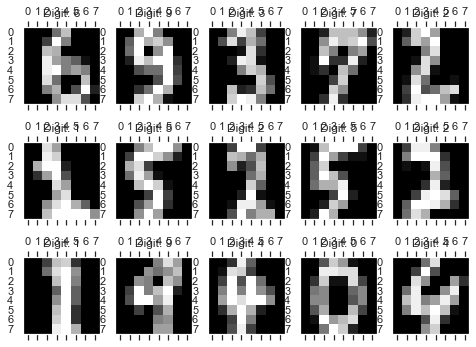

In [5]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

plt.gray()
fig = plt.figure(figsize=(8, 6))
for i in range(0, 15):
    ax = fig.add_subplot(3,
                         5,
                         i + 1,
                         title="Digit: {}".format(
                             str(df.loc[rndperm[i], 'label'])))
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape(
        (8, 8)).astype(float))
plt.show()

In [4]:
# Count per label
df.label.value_counts()

3    183
1    182
5    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: label, dtype: int64

What we can do is create a scatterplot of the first and second principal component and color each of the different types of digits with a different color. If we are lucky the same type of digits will be positioned (i.e., clustered) together in groups, which would mean that the first two principal components actually tell us a great deal about the specific types of digits.

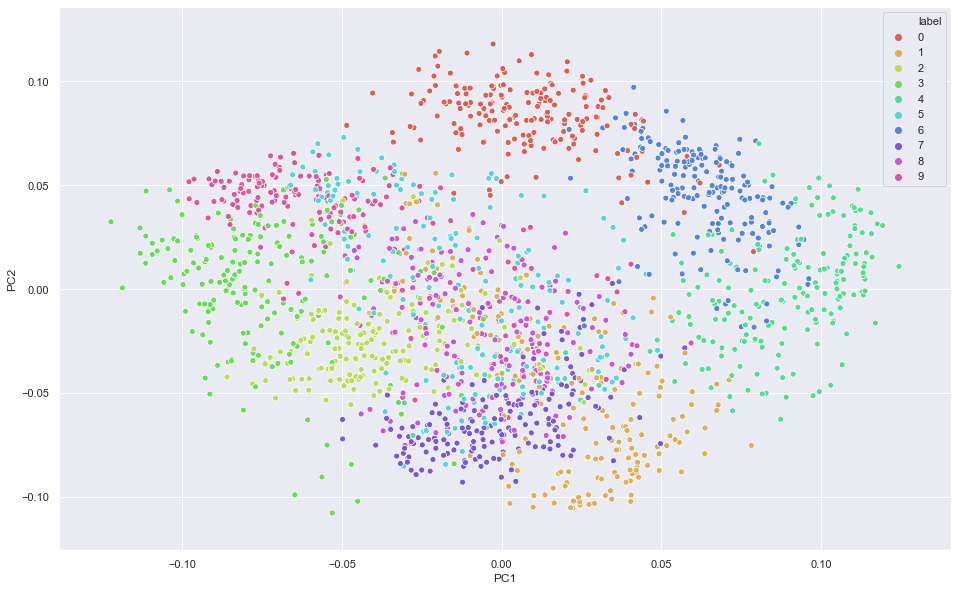

In [7]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

plt.figure(figsize=(16, 10))
sns.scatterplot(x="PC1",
                y="PC2",
                hue="label",
                palette=sns.color_palette("hls", 10),
                data=df.loc[rndperm, :],
                legend="full",
                alpha=1)